In [102]:
from elasticsearch import Elasticsearch

In [103]:
es = Elasticsearch("10.0.2.15:9200")

In [104]:
res = es.search(index="srm_development_papers", body={ "aggs": { "originator_agg": { "terms": { "field": "originator", "size": 20 } } }})
labels = [ bucket['key'] for bucket in res['aggregations']['originator_agg']['buckets'] ]
counts = [ bucket['doc_count'] for bucket in res['aggregations']['originator_agg']['buckets'] ]

In [106]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [107]:
width = 1/1.5
count = len(labels)
xs = np.arange(count)

nXs = list(xs)
nXs = [i for i in range(len(nXs)-1, -1, -1)]

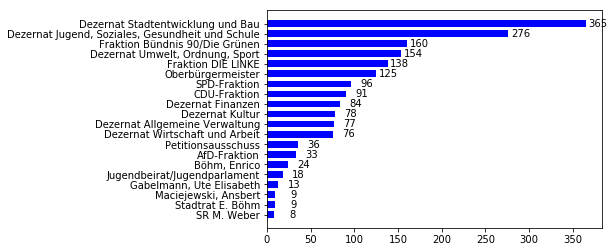

In [108]:
bars = plt.barh(nXs, counts, width, color="blue")
plt.yticks(nXs, labels)
def autolabel(rects):
    for rect in rects:
        w = rect.get_width()
        plt.text(25 + w, rect.get_y() + rect.get_height()/2., '%d' % int(w), ha='right', va='center')
autolabel(bars)
plt.show()